## Lecture 9: Interatomic potentials and thermostats

The main code is written in C++ and can be found in the ```code/``` folder (it can be built with the Cmake list). It's essentially the same code of Exercise 7 (a Monte Carlo simulation) with the implementation of the Velocity Verlet algorithm for EOM integration and two thermostats (Berendsen and Andersen)

As usual, this Python notebook is an offline analysis of the files (.xyz trajectories or .dat energies) produced by the much more efficient C++ code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

Consistency checks:

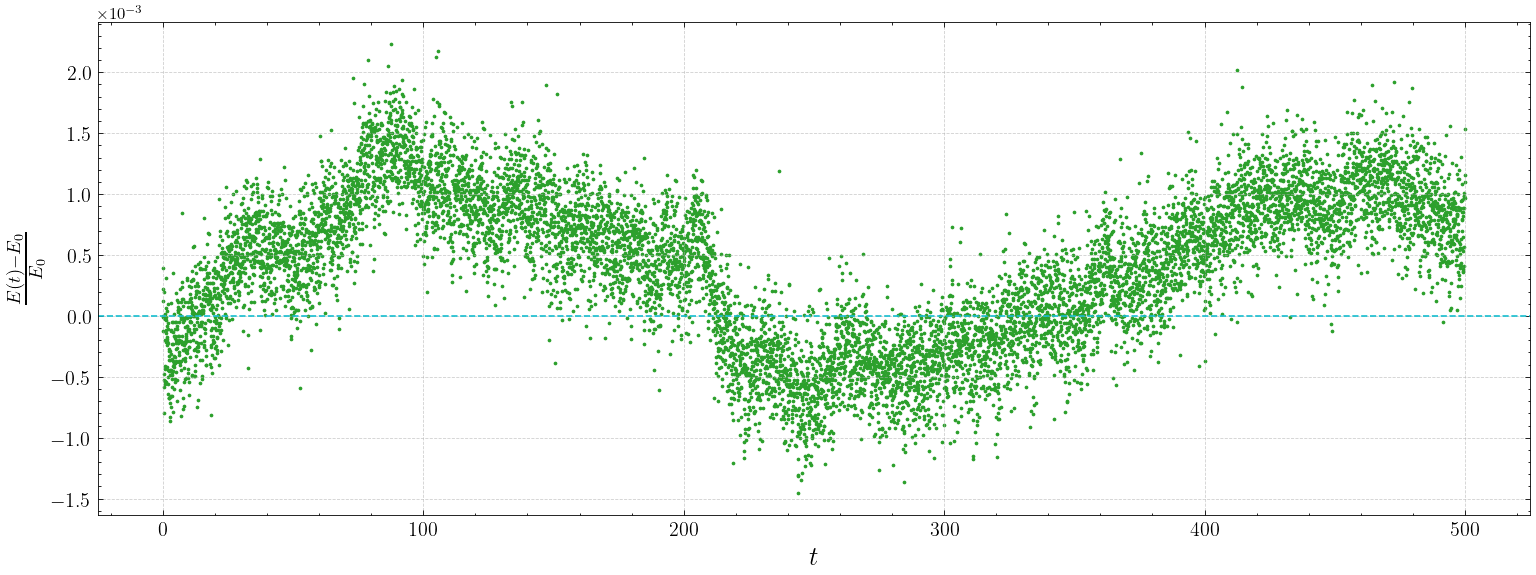

In [ ]:
filename = './data/energy_noThermo.dat'
data = np.loadtxt(filename)

steps = data[:, 0] * 0.005
ke = data[:, 1] 
pe = data[:, 2]   
etot = data[:, 3]

mean_e = np.mean(etot)
drift = (etot - etot[0]) / abs(etot[0])

plt.figure(figsize=(13, 5), dpi=120)
plt.scatter(steps, drift, color='tab:green', s=1.5,linewidth=1)
plt.xlabel(fr'$t$', fontsize=16)
plt.ylabel(fr'$\frac{{E(t) - E_0}}{{E_0}}$', fontsize=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axhline(0, color='tab:cyan', linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()
#plt.savefig('fig/energy_conservation.pdf', dpi=300)
plt.show()

Now let's vary $\tau$ in Berendsen

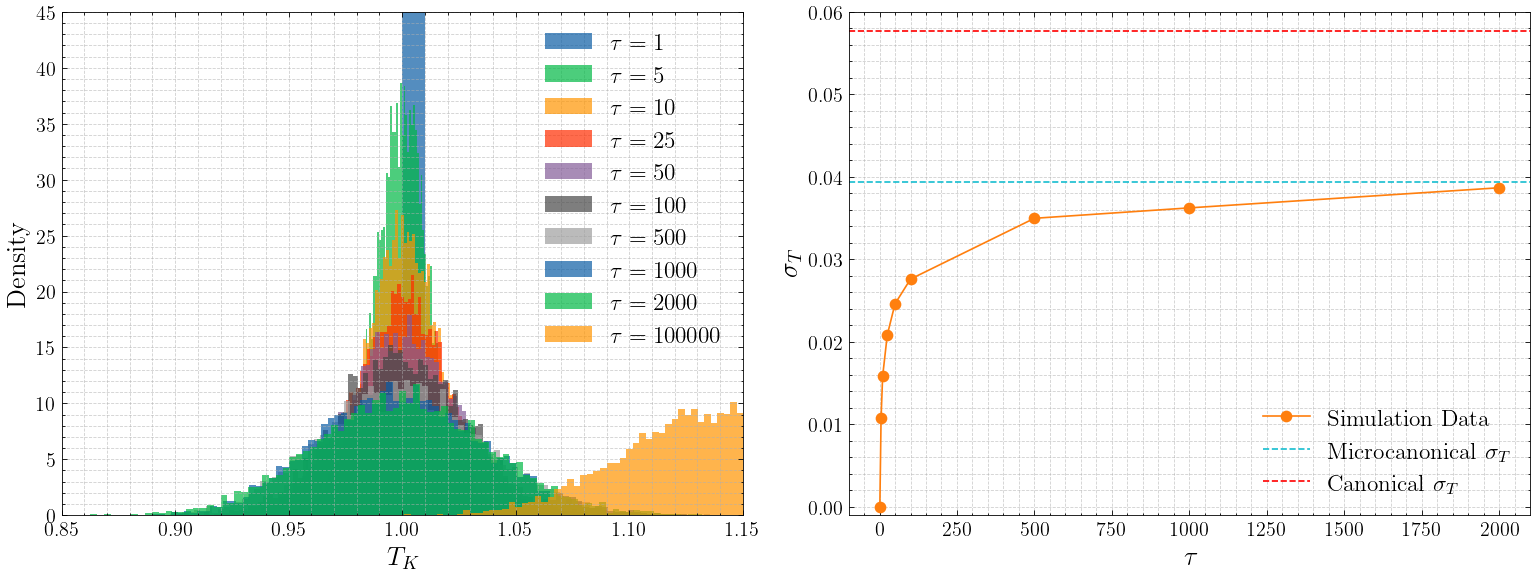

In [ ]:
tau = [1, 5, 10, 25, 50, 100, 500, 1000, 2000, 100000]
stddev_temp = []

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)
for t in tau:
    filename = f'./data/energy_Ber_tau{t}.dat'
    data = np.loadtxt(filename)

    steps = data[:, 0] * 0.005
    ke = data[:, 1] 
    temp = 2/3 * ke[2000:]
    stddev_temp.append(np.std(temp))
    plt.hist(temp, bins = 100, label = fr"$\tau = {t}$", linewidth=1.5, alpha = 0.7, density=True)
    
plt.xlabel(r'$T_K$', fontsize=16)
plt.ylabel(r'Density', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.ylim(0,45)
plt.xlim(0.85,1.15)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.legend(fontsize=14, loc='upper right')

plt.subplot(1,2,2)
plt.plot(tau[:-1], stddev_temp[:-1], marker='o', linestyle='-', color='tab:orange', label='Simulation Data')
plt.xlabel(r'$\tau$', fontsize=16)
plt.ylabel(r'$\sigma_T$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.ylim(-0.001,0.06)
plt.axhline(0.0394, color='tab:cyan', linestyle='--', label = r"Microcanonical $\sigma_T$")
plt.axhline(0.0577, color='red', linestyle='--', label = r"Canonical $\sigma_T$")
plt.tight_layout()  
plt.legend(fontsize=14, loc='lower right')
plt.savefig('fig/berendsen_kinetic.pdf', dpi=300)
plt.show()

Andersen (canonical!)

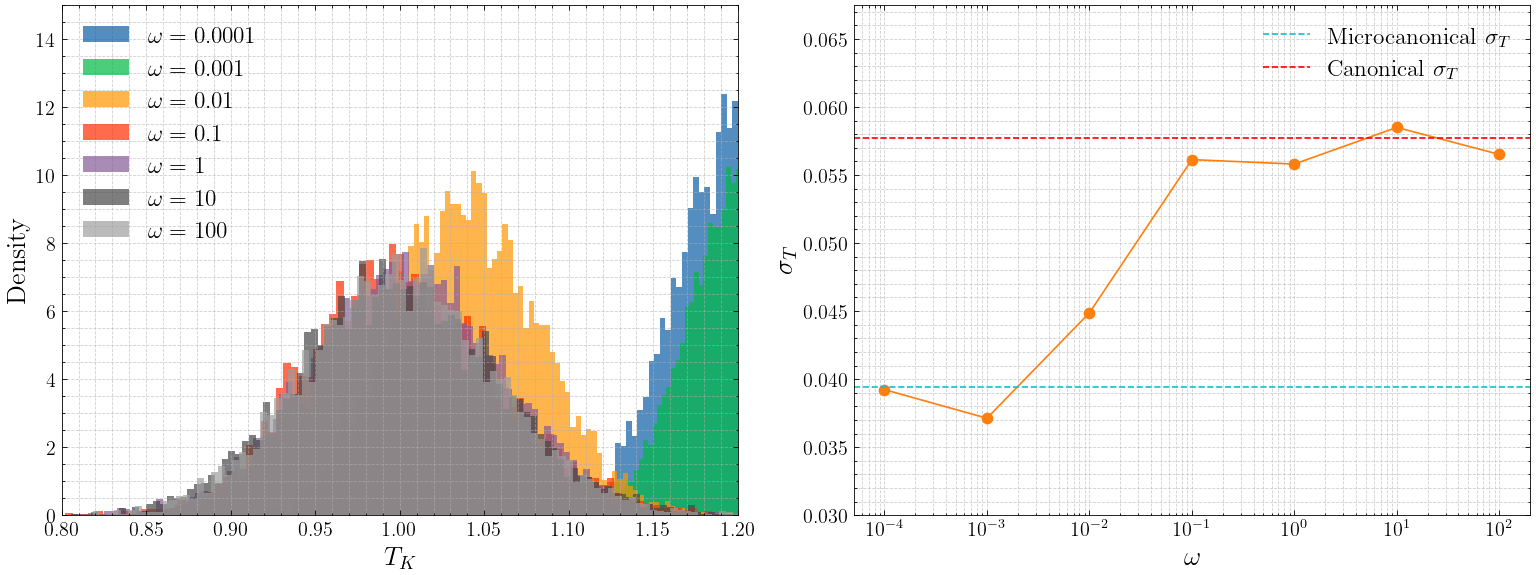

In [18]:
omega = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
stddev_temp = []

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)
for w in omega:
    filename = f'./data/energy_And_omega{w}.dat'
    data = np.loadtxt(filename)

    steps = data[:, 0] * 0.005
    ke = data[:, 1] 
    temp = 2/3 * ke[2000:]
    stddev_temp.append(np.std(temp))
    plt.hist(temp[2000:], bins = 100, label = fr"$\omega = {w}$", linewidth=1.5, alpha = 0.7, density=True)

plt.ylim(0,15)
plt.xlabel(r'$T_K$', fontsize=16)
plt.ylabel(r'Density', fontsize=16)
plt.xlim(0.8, 1.2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.legend(fontsize=14, loc='upper left')

plt.subplot(1,2,2)
plt.plot(omega, stddev_temp, marker='o', linestyle='-', color='tab:orange')
plt.xscale('log')
plt.xlabel(r'$\omega$', fontsize=16)
plt.ylabel(r'$\sigma_T$', fontsize=16)
plt.ylim(0.03,0.0675)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.axhline(0.0394, color='tab:cyan', linestyle='--', label = r"Microcanonical $\sigma_T$")
plt.axhline(0.0577, color='red', linestyle='--', label = r"Canonical $\sigma_T$")
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()  
plt.savefig('fig/andersen_kinetic.pdf', dpi=300)
plt.show()

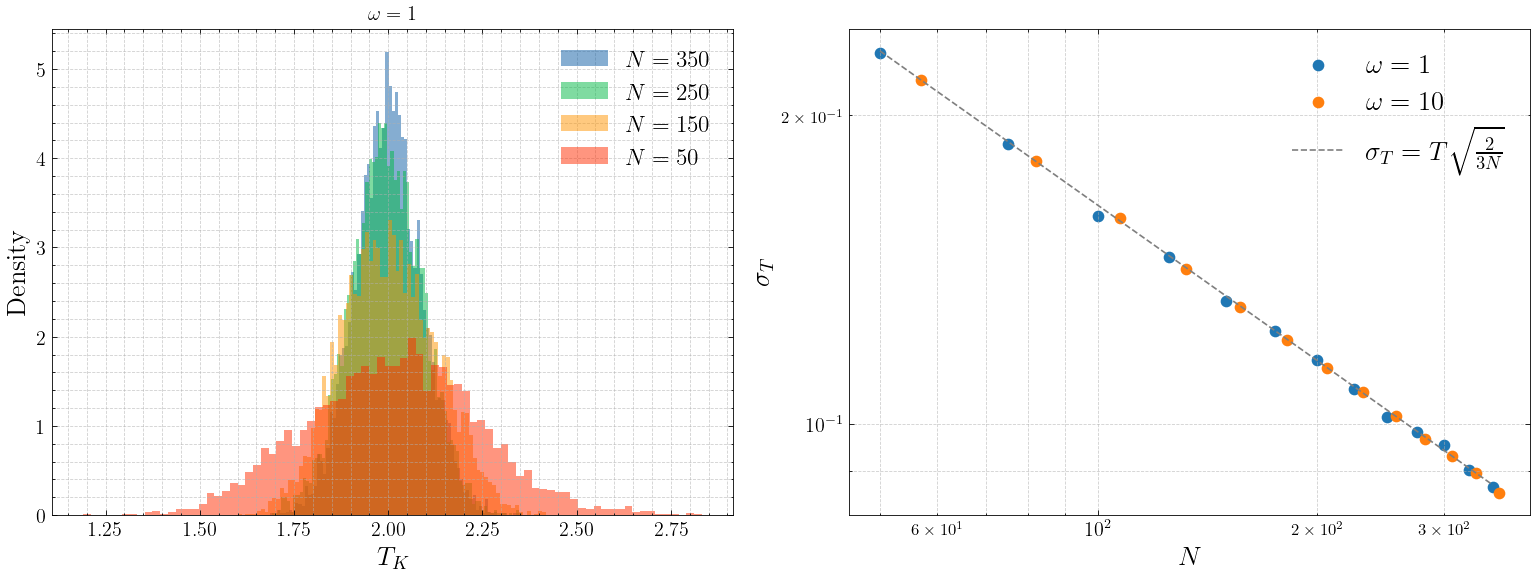

In [19]:
N = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350]
N2 = [n+7 for n in N]

stddev_temp_omega1 = np.zeros(len(N))
stddev_temp_omega10 = np.zeros(len(N2))

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)

for n, n2 in zip(N[::-1], N2[::-1]):
    for nrun in range(10):
        filename = f'./data/Andersen/energy_omega1_N{n}_run{nrun}.dat'
        data = np.loadtxt(filename)
        filename2 = f'./data/Andersen/energy_omega10_N{n2}_run{nrun}.dat'
        data2 = np.loadtxt(filename2)

        steps = data[:, 0] * 0.005
        ke = data[:, 1] 
        ke2 = data2[:, 1]
        temp = 2/3 * ke[2000:]
        temp2 = 2/3 * ke2[2000:]
        stddev_temp_omega1[N.index(n)] += np.std(temp) / 10
        stddev_temp_omega10[N.index(n)] += np.std(temp2) / 10
    # Display last run only for a range of selected N
    if (n in [50, 150, 250, 350]):
        plt.hist(temp[2000:], bins = 80, label = fr"$N = {n}$", linewidth=1.5, alpha = 0.5, density=True)

plt.xlabel(r'$T_K$', fontsize=16)
plt.ylabel(r'Density', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.title(fr"$\omega = 1$")
plt.legend(fontsize=14, loc='upper right')

plt.subplot(1,2,2)
plt.scatter(N[::1], np.array(stddev_temp_omega1), marker='o', color='tab:blue', label=r'$\omega = 1$')
plt.scatter(N2[::1], np.array(stddev_temp_omega10), marker='o', color='tab:orange', label=r'$\omega = 10$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=16)
plt.ylabel(r'$\sigma_T$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)

x = np.array([50, 350])
y = np.power(4 * (2 / 3) * (1/(x)), 0.5)
plt.plot(x, y, linestyle='--', color='tab:gray', label=r'$\sigma_T = T \sqrt{\frac{{2}}{{3N}}}$')
plt.legend(fontsize=16)
plt.tight_layout()  
plt.savefig('fig/andersen_size.pdf', dpi=300)
plt.show()

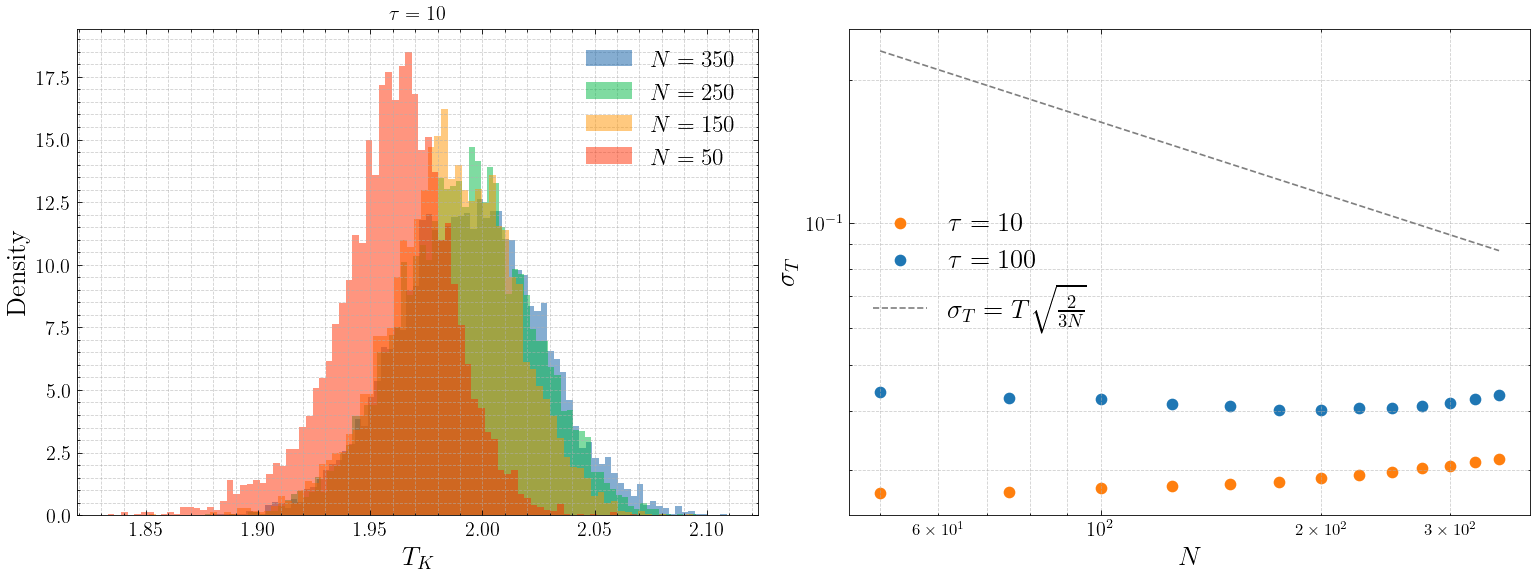

In [22]:
N = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350]
stddev_temp_tau10 = np.zeros(len(N))
stddev_temp_tau100 = np.zeros(len(N))

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)

for n in N[::-1]:
    for nrun in range(10):
        filename = f'./data/Berendsen/energy_tau10_N{n}_run{nrun}.dat'
        data = np.loadtxt(filename)
        filename2 = f'./data/Berendsen/energy_tau100_N{n}_run{nrun}.dat'
        data2 = np.loadtxt(filename2)

        steps = data[:, 0] * 0.005
        ke = data[:, 1] 
        ke2 = data2[:, 1]
        temp = 2/3 * ke[2000:]
        temp2 = 2/3 * ke2[2000:]
        stddev_temp_tau10[N.index(n)] += np.std(temp) / 10
        stddev_temp_tau100[N.index(n)] += np.std(temp2) / 10
    # Display last run only for a range of selected N
    if (n in [50, 150, 250, 350]):
        plt.hist(temp[2000:], bins = 80, label = fr"$N = {n}$", linewidth=1.5, alpha = 0.5, density=True)

plt.xlabel(r'$T_K$', fontsize=16)
plt.ylabel(r'Density', fontsize=16)
plt.title(fr"$\tau = 10$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.legend(fontsize=14, loc='upper right')

plt.subplot(1,2,2)
plt.scatter(N[::1], np.array(stddev_temp_tau10), marker='o', label = r'$\tau = 10$', color='tab:orange')
plt.scatter(N[::1], np.array(stddev_temp_tau100), marker='o', label = r'$\tau = 100$', color='tab:blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=16)
plt.ylabel(r'$\sigma_T$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)

x = np.array([50, 350])
y = np.power(4 * (2 / 3) * (1/(x)), 0.5)
plt.plot(x, y, linestyle='--', color='tab:gray', label=r'$\sigma_T = T \sqrt{\frac{{2}}{{3N}}}$')
plt.legend(fontsize=16)
plt.tight_layout()  
plt.savefig('fig/berendsen_size.pdf', dpi=300)
plt.show()

## Crystalline structures


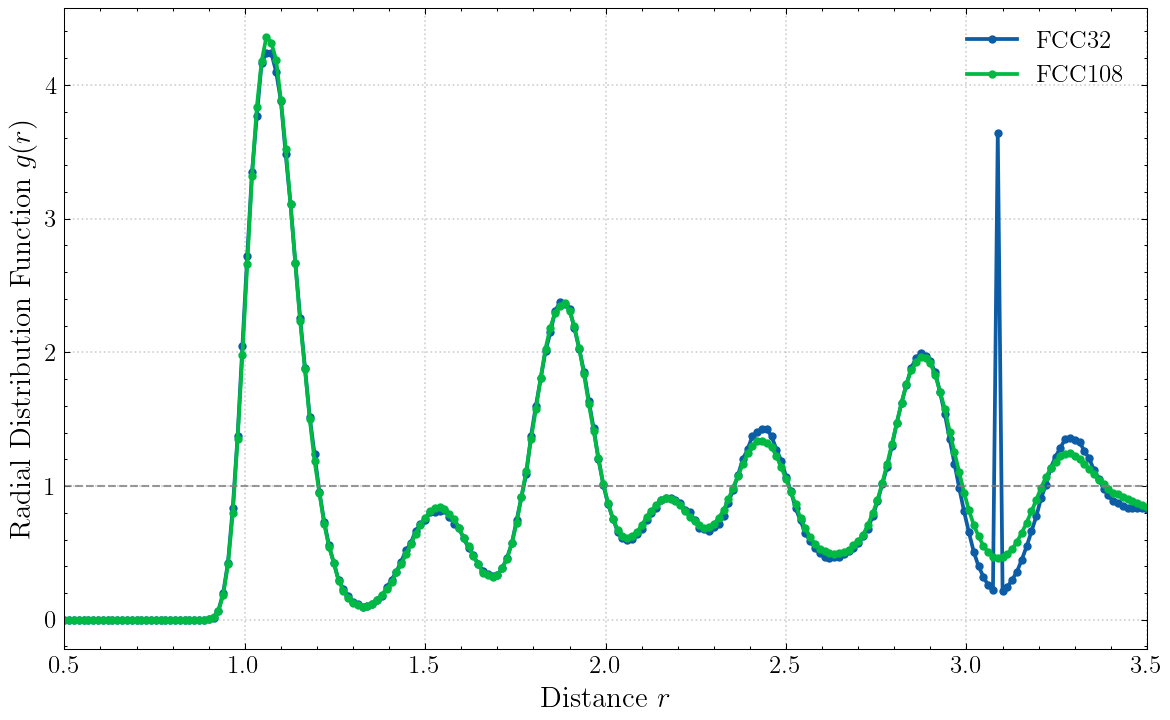

In [28]:
# First of all, analyzie the crystalline structure
file108 = './data/RDF108/data'
file32 = './data/RDF32/data'

rdf108 = np.zeros((300, 2))
rdf32 = np.zeros((300, 2))

for i in np.arange(1000, 9999, 10):
    data = np.loadtxt( f"{file32}.{i}",comments='#', delimiter=None, skiprows=1)
    r = data[:, 0] 
    g_r = data[:, 1]
    rdf32[:,0] = r
    rdf32[:,1] += g_r/900.0

    data = np.loadtxt( f"{file108}.{i}",comments='#', delimiter=None, skiprows=1)
    r = data[:, 0] 
    g_r = data[:, 1]
    rdf108[:,0] = r
    rdf108[:,1] += g_r/900.0


plt.figure(figsize=(8, 5), dpi=150)
plt.plot(rdf32[:,0], rdf32[:,1], marker = "o",markersize=3, linestyle='-', linewidth=1.8, label=r"FCC32")
plt.plot(rdf108[:,0], rdf108[:,1], marker = "o", markersize=3, linestyle='-', linewidth=1.8, label=r"FCC108")
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1.0, alpha=0.8)
plt.xlim(0.5, 3.5)
plt.xlabel(r"Distance $r$", fontsize=14)
plt.ylabel(r"Radial Distribution Function $g(r)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.legend(framealpha=0.9, fontsize=12)
plt.tight_layout()
plt.savefig('./fig/RDF_plot_crystalline.pdf', dpi=300)
plt.show()

## Flying ice cube effect:

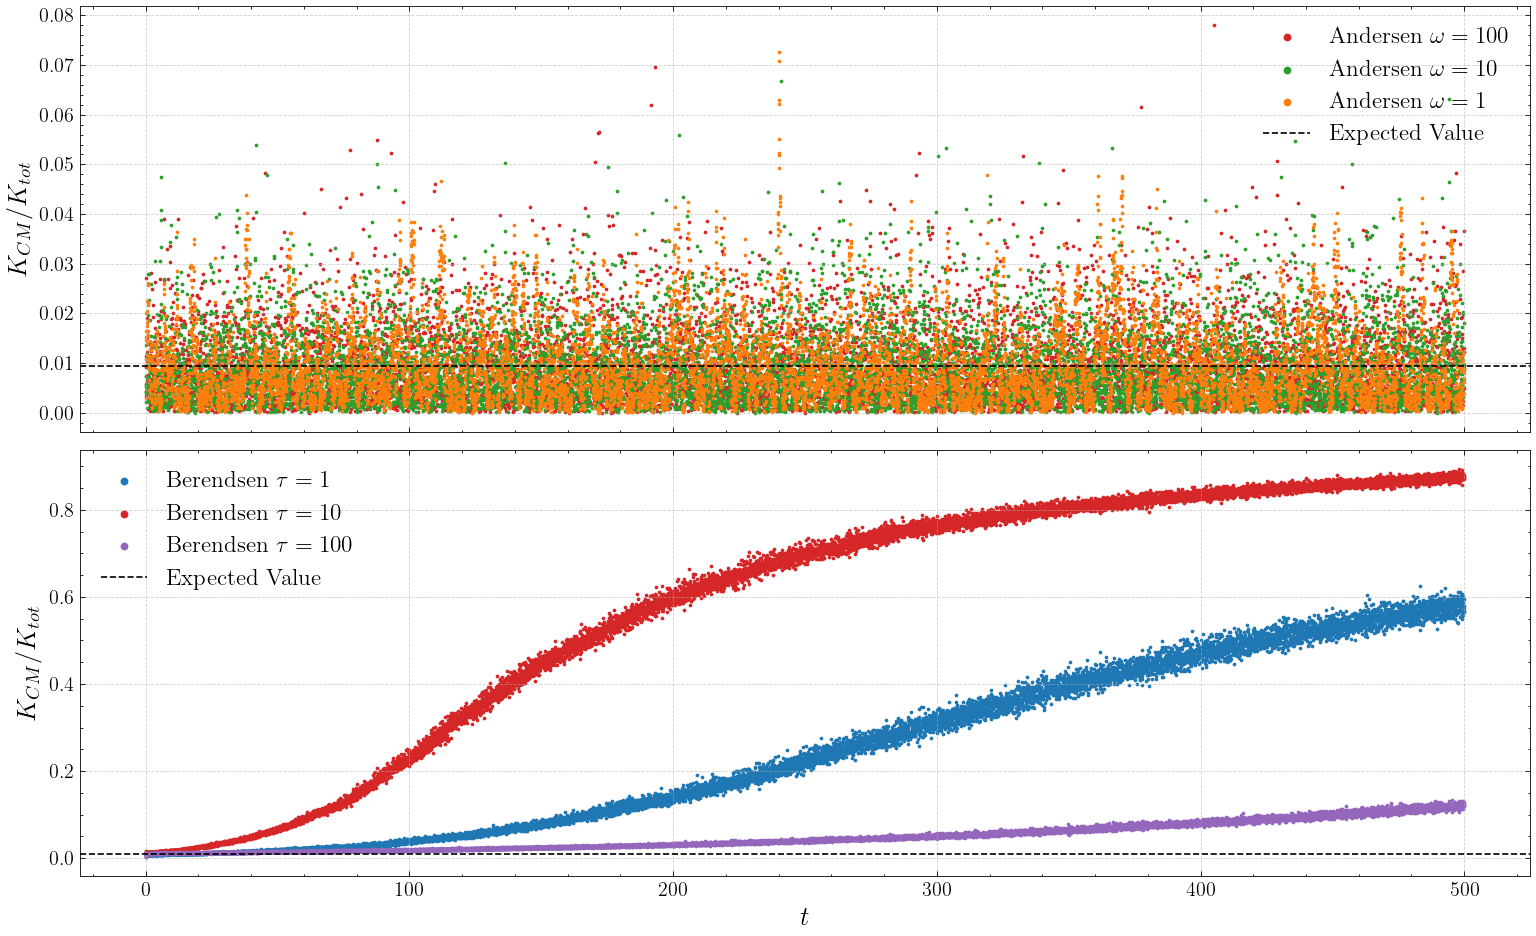

In [31]:
# Finally, the energy analysis
filename1 = './data/VCOM_Andersen_omega10.dat'
filename2 = './data/VCOM_Andersen_omega1.dat'
filename6 = './data/VCOM_Andersen_omega100.dat'

filename3 = "./data/VCOM_Berendsen_tau1.dat"
filename4 = "./data/VCOM_Berendsen_tau10.dat"
filename5 = "./data/VCOM_Berendsen_tau100.dat"

data1 = np.loadtxt(filename1)
ke1 = data1[:, 1]
kecom1 = data1[:,4]
steps = data1[:, 0] * 0.005

data2 = np.loadtxt(filename2)
ke2 = data2[:, 1]
kecom2 = data2[:,4]

data3 = np.loadtxt(filename3)
ke3 = data3[:, 1]
kecom3 = data3[:,4]

data4 = np.loadtxt(filename4)
ke4 = data4[:, 1]
kecom4 = data4[:,4]

data5 = np.loadtxt(filename5)
ke5 = data5[:, 1]
kecom5 = data5[:,4]

data6 = np.loadtxt(filename6)
ke6 = data6[:, 1]
kecom6 = data6[:,4]


plt.figure(figsize=(13, 8), dpi=120)

plt.subplot(2, 1, 1) 
plt.scatter(steps, kecom6 / ke6, color='tab:red', s=1.5, linewidth=1, label=r'Andersen $\omega = 100$')
plt.scatter(steps, kecom1 / ke1, color='tab:green', s=1.5, linewidth=1, label=r'Andersen $\omega = 10$')
plt.scatter(steps, kecom2 / ke2, color='tab:orange', s=1.5, linewidth=1, label=r'Andersen $\omega = 1$')
plt.axhline(1/(108-1), color='black', linestyle='--', linewidth=1, label='Expected Value')
plt.ylabel(fr'$K_{{CM}} / K_{{tot}}$', fontsize=16)
plt.legend(fontsize=14, loc='best', markerscale=3)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tick_params(labelbottom=False) 

plt.subplot(2, 1, 2) # 2 righe, 1 colonna, grafico numero 2
plt.scatter(steps, kecom3 / ke3, color='tab:blue', s=1.5, linewidth=1, label=r'Berendsen $\tau = 1$')
plt.scatter(steps, kecom4 / ke4, color='tab:red', s=1.5, linewidth=1, label=r'Berendsen $\tau = 10$')
plt.scatter(steps, kecom5 / ke5, color='tab:purple', s=1.5, linewidth=1, label=r'Berendsen $\tau = 100$')
plt.axhline(1/(108-1), color='black', linestyle='--', linewidth=1, label='Expected Value')
plt.xlabel(fr'$t$', fontsize=16)
plt.ylabel(fr'$K_{{CM}} / K_{{tot}}$', fontsize=16)
plt.legend(fontsize=14, loc='best', markerscale=3)
# Stile grafico sotto
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)

plt.tight_layout()
plt.savefig('fig/equipartition.pdf', dpi=300)
plt.show()
# All of this is done with fcc108.xyz